In [95]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler


In [96]:
df = pd.read_csv("segmentation data.csv")

In [97]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
ID,2000.0,1.000010e+08,577.494589,1.000000e+08,1.000005e+08,1.000010e+08,1.000015e+08,100002000.0
Sex,2000.0,4.570000e-01,0.498272,0.000000e+00,0.000000e+00,0.000000e+00,1.000000e+00,1.0
Marital status,2000.0,4.965000e-01,0.500113,0.000000e+00,0.000000e+00,0.000000e+00,1.000000e+00,1.0
Age,2000.0,3.590900e+01,11.719402,1.800000e+01,2.700000e+01,3.300000e+01,4.200000e+01,76.0
Education,2000.0,1.038000e+00,0.599780,0.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,3.0
Income,2000.0,1.209544e+05,38108.824679,3.583200e+04,9.766325e+04,1.155485e+05,1.380722e+05,309364.0
Occupation,2000.0,8.105000e-01,0.638587,0.000000e+00,0.000000e+00,1.000000e+00,1.000000e+00,2.0
Settlement size,2000.0,7.390000e-01,0.812533,0.000000e+00,0.000000e+00,1.000000e+00,1.000000e+00,2.0
Unnamed: 8,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Unnamed: 11,4.0,3.540710e+01,28.937574,1.171940e+01,1.642985e+01,2.695450e+01,4.593175e+01,76.0


In [98]:
(df.isnull().sum()*100/len(df))

ID                   0.497512
Sex                  0.497512
Marital status       0.497512
Age                  0.497512
Education            0.497512
Income               0.497512
Occupation           0.497512
Settlement size      0.497512
Unnamed: 8         100.000000
Unnamed: 9          99.950249
Unnamed: 10          0.248756
Unnamed: 11         99.800995
Unnamed: 12         99.950249
Unnamed: 13          0.447761
dtype: float64

In [99]:
df = df.drop(['Unnamed: 11','Unnamed: 12','Unnamed: 9','Unnamed: 8'],axis = 1)

In [100]:
df

,ID,Sex,Marital status,Age,Education,Income,Occupation,Settlement size,Unnamed: 10,Unnamed: 13
0,100000001.0,0.0,0.0,67.0,2.0,124670.0,1.0,2.0,NaN,NaN
1,100000002.0,1.0,1.0,22.0,1.0,150773.0,1.0,2.0,NaN,NaN
2,100000003.0,0.0,0.0,49.0,1.0,89210.0,0.0,0.0,MIN,NaN
3,100000004.0,0.0,0.0,45.0,1.0,171565.0,1.0,1.0,MAX,NaN
4,100000005.0,0.0,0.0,53.0,1.0,149031.0,1.0,1.0,MEAN,NaN
...,...,...,...,...,...,...,...,...,...,...
2005,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,-0.76019235,0.155172
2006,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,-0.418878016,0.224138
2007,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,-1.0161781,0.103448
2008,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,-0.930849516,0.120690


In [101]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2010 entries, 0 to 2009
Data columns (total 10 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   ID               2000 non-null   float64
 1   Sex              2000 non-null   float64
 2   Marital status   2000 non-null   float64
 3   Age              2000 non-null   float64
 4   Education        2000 non-null   float64
 5   Income           2000 non-null   float64
 6   Occupation       2000 non-null   float64
 7   Settlement size  2000 non-null   float64
 8   Unnamed: 10      2005 non-null   object 
 9   Unnamed: 13      2001 non-null   float64
dtypes: float64(9), object(1)
memory usage: 157.2+ KB


In [102]:
df.isnull().sum()

ID                 10
Sex                10
Marital status     10
Age                10
Education          10
Income             10
Occupation         10
Settlement size    10
Unnamed: 10         5
Unnamed: 13         9
dtype: int64

In [103]:
for i in df.columns:
    df.dropna(subset = i ,inplace = True)

In [104]:
df.isnull().sum()

ID                 0
Sex                0
Marital status     0
Age                0
Education          0
Income             0
Occupation         0
Settlement size    0
Unnamed: 10        0
Unnamed: 13        0
dtype: int64

In [105]:
df.head()

,ID,Sex,Marital status,Age,Education,Income,Occupation,Settlement size,Unnamed: 10,Unnamed: 13
9,100000010.0,0.0,1.0,28.0,1.0,174646.0,2.0,0.0,2.652950987,0.844828
10,100000011.0,1.0,1.0,25.0,1.0,108469.0,1.0,0.0,-1.186835267,0.068966
11,100000012.0,1.0,1.0,24.0,1.0,127596.0,1.0,0.0,1.117036485,0.534483
12,100000013.0,1.0,1.0,22.0,1.0,108687.0,1.0,2.0,0.775722152,0.465517
13,100000014.0,0.0,0.0,60.0,2.0,89374.0,0.0,0.0,1.458350819,0.603448


In [106]:
df.isnull().sum()

ID                 0
Sex                0
Marital status     0
Age                0
Education          0
Income             0
Occupation         0
Settlement size    0
Unnamed: 10        0
Unnamed: 13        0
dtype: int64

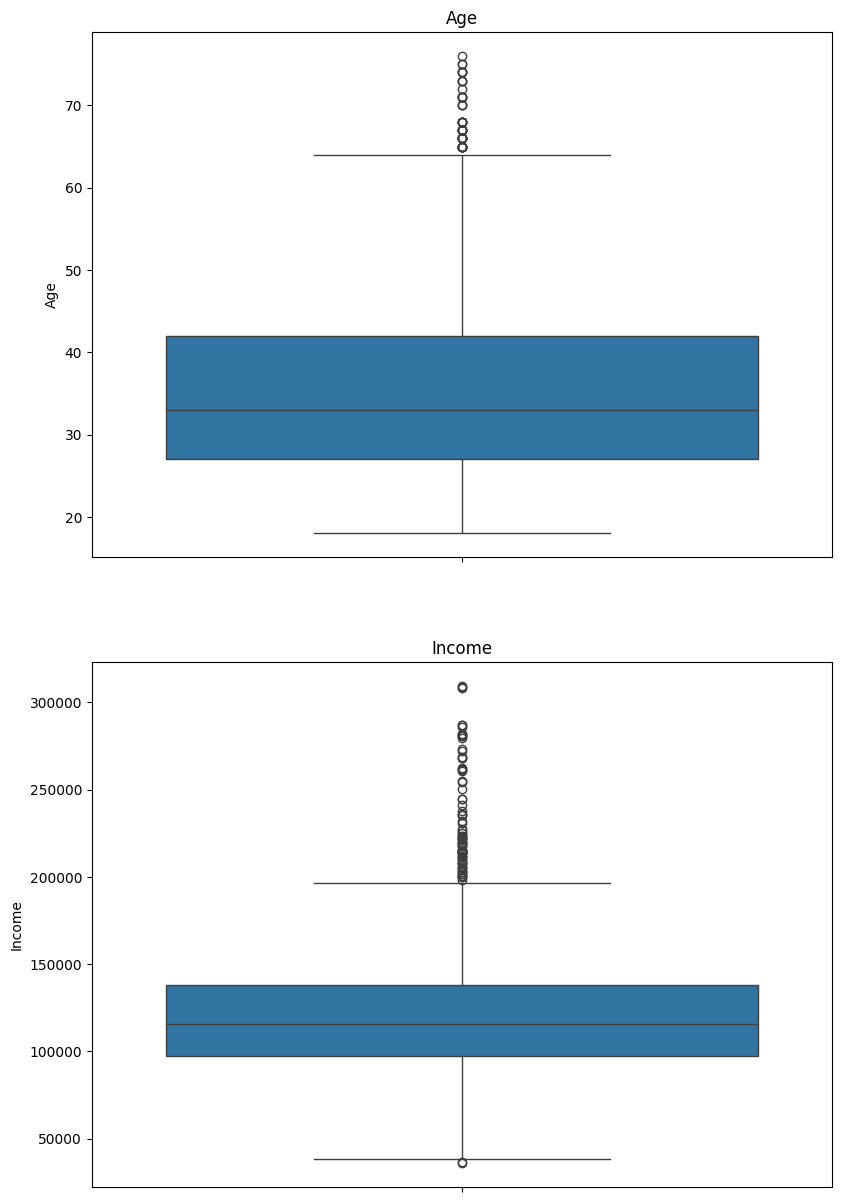

In [107]:
plt.figure(figsize=(21,15))

plt.subplot2grid((2,2),(0,0))
box1 = sns.boxplot(y=df.Age)
plt.title('Age')

plt.subplot2grid((2,2),(1,0))
box1 = sns.boxplot(y=df.Income)
plt.title('Income')
plt.show()

In [116]:
Q1 = df['Age'].quantile(0.25)
Q3 = df['Age'].quantile(0.75)

# Calculate the Interquartile Range (IQR)
IQR = Q3 - Q1

# Determine the outlier boundaries
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

# Drop outliers
df_mean = df.loc[(df['Age'] >= lower_bound) & (df['Age'] <= upper_bound),'Age'].mean()



In [117]:
df.loc[(df['Age'] < lower_bound) | (df['Age'] > upper_bound),'Age'] = df_mean

In [118]:
df_mean

34.05199972455462

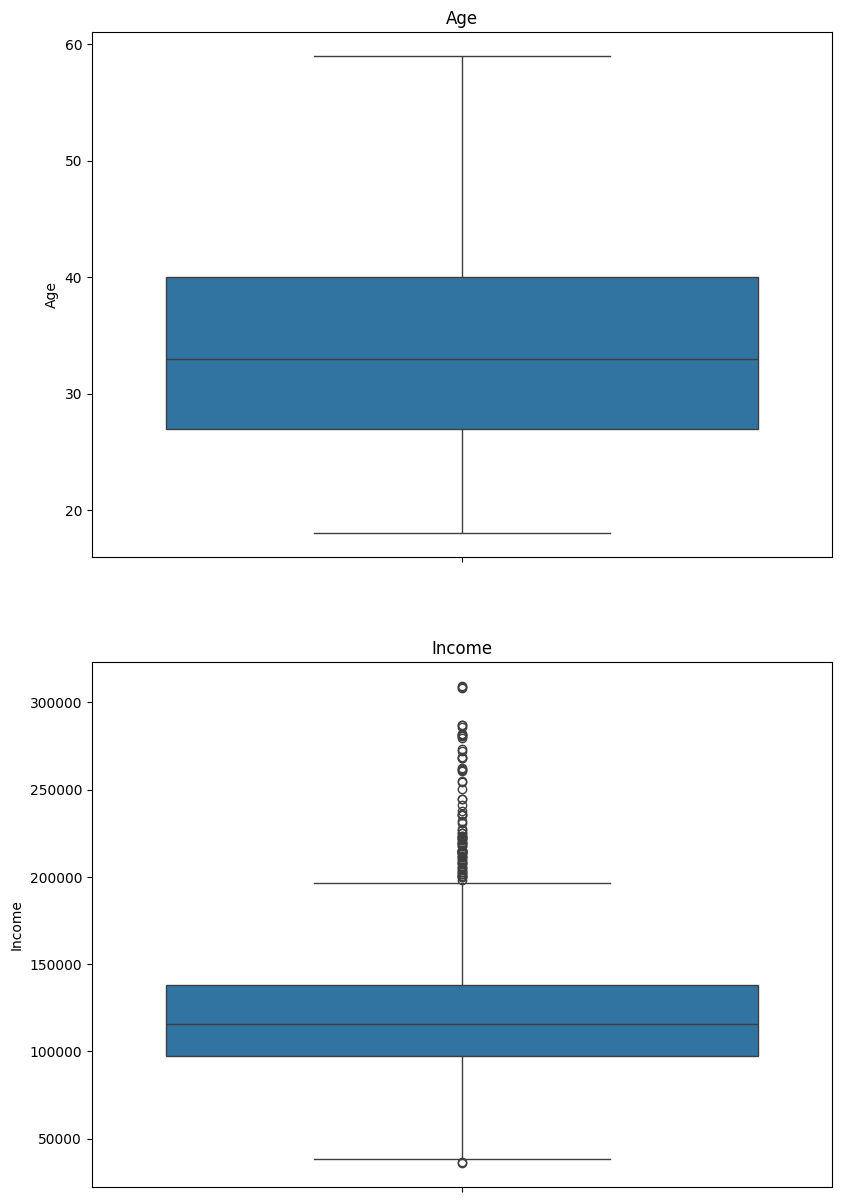

In [119]:
plt.figure(figsize=(21,15))

plt.subplot2grid((2,2),(0,0))
box1 = sns.boxplot(y=df.Age)
plt.title('Age')

plt.subplot2grid((2,2),(1,0))
box1 = sns.boxplot(y=df.Income)
plt.title('Income')
plt.show()

In [129]:
Q1 = df['Income'].quantile(0.25)
Q3 = df['Income'].quantile(0.75)

# Calculate the Interquartile Range (IQR)
IQR = Q3 - Q1

# Determine the outlier boundaries
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

# Drop outliers
df_mean = df.loc[(df['Income'] >= lower_bound) & (df['Income'] <= upper_bound),'Income'].mean()

In [132]:
df_mean

114932.84314702157

In [130]:
df.loc[(df['Income'] < lower_bound) | (df['Income'] > upper_bound),'Income'] = df_mean

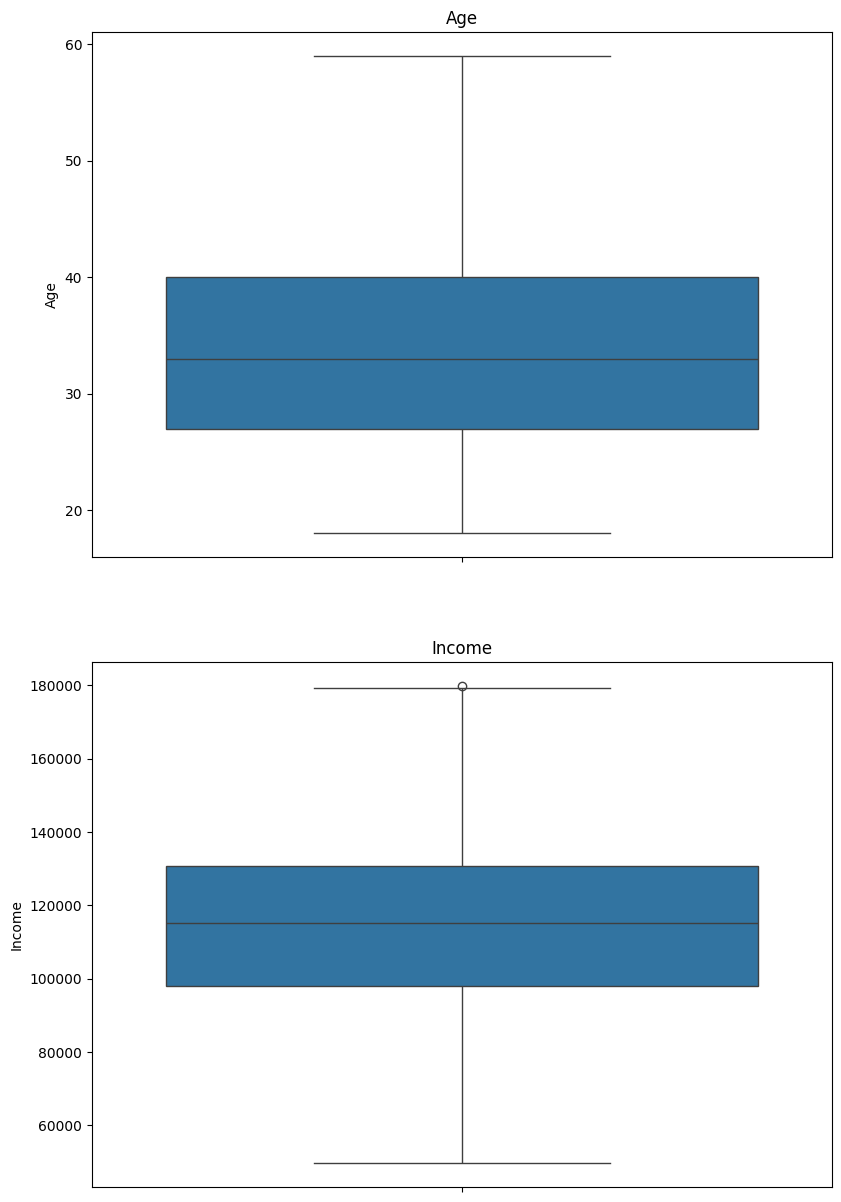

In [131]:
plt.figure(figsize=(21,15))

plt.subplot2grid((2,2),(0,0))
box1 = sns.boxplot(y=df.Age)
plt.title('Age')

plt.subplot2grid((2,2),(1,0))
box1 = sns.boxplot(y=df.Income)
plt.title('Income')
plt.show()